# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 16    

*William Hicks*

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

** Update (5/15) **: you may use the equations of motion from exercise 8.14 of the book. This assumes equal masses and equal length pendulum rods.

<img src="HW5_EOM.png">

** Check **: for the following parameters:

`g = 9.8`  
`dt = 0.01`  


`L1 = 1.0`  
`L2 = 1.0`  
`m1 = 1.0`  
`m2 = 1.0`  

`omega1_init = 0.0`  
`omega2_init = 0.0`

I obtained:

<img src="HW5_Prob1.png">

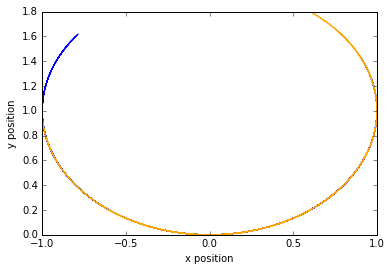

In [151]:
%matplotlib inline
import numpy as np
from math import sin as sin
from math import cos as cos
import matplotlib.pyplot as plt

g=9.8
dt=0.01
L=1.0
m=1.0
omega_init=0.0
theta_init=2.0
t_init=0.0
t_fin=20.0

def dwdt1(theta1,omega1,theta2,omega2):
    num=-((omega1**2)*sin(2*theta1-2*theta2)+2*(omega2**2)*sin(theta1-theta2)+(g/L)*(sin(theta1-2*theta2)+3*sin(theta1)))
    denom=3-cos(2*theta1-2*theta2)
    return num/denom

def dwdt2(theta1,omega1,theta2,omega2):
    num=(4*(omega1**2))*sin(theta1-theta2)+(omega2**2)*sin(2*theta1-2*theta2)+2*(g/L)*(sin(2*theta1-theta2)-sin(theta2))
    denom=3-cos(2*theta1-2*theta2)
    return num/denom

def times_and_angles(theta_init,omega_init,t_init,t_fin):
    theta1_points=[]
    omega1_points=[]
    
    theta2_points=[]
    omega2_points=[]
    
    theta1=theta_init
    omega1=omega_init
    
    theta2=theta_init
    omega2=omega_init
    
    tpoints=np.arange(t_init,t_fin,dt)
    
    theta1_half = dt*omega1
    omega1_half = dt*dwdt1(theta1,omega1,theta2,omega2)
    theta2_half = dt*omega2
    omega2_half = dt*dwdt2(theta1,omega1,theta2,omega2)
    
    for t in tpoints:
        theta1_points.append(theta1)
        omega1_points.append(omega1)
        theta2_points.append(theta2)
        omega2_points.append(omega2)

        theta1_half += 0.5*dt*omega1_points[-1]
        omega1_half += 0.5*dt*dwdt1(theta1_points[-1],omega1_points[-1],theta2_points[-1],omega2_points[-1])
        theta2_half += 0.5*dt*omega2_points[-1]
        omega2_half += 0.5*dt*dwdt2(theta1_points[-1],omega1_points[-1],theta2_points[-1],omega2_points[-1])
        
        theta1 += dt*omega1_half
        omega1 += dt*dwdt1(theta1_half,omega1_points[-1],theta2_half,omega2_points[-1])
        theta2 += dt*omega2_half
        omega2 += dt*dwdt2(theta1_half,omega1_half,theta2_half,omega2_half)
        
    tt = np.array(tpoints)
    thetas1 = np.array(theta1_points)
    omegas1 = np.array(omega1_points)
    thetas2 = np.array(theta2_points)
    omegas2 = np.array(omega2_points)
    
    return tt,thetas1,omegas1,thetas2,omegas2

times,thetas1,omegas1,thetas2,omegas2=times_and_angles(theta_init,omega_init,t_init,t_fin)
xs1=L*np.sin(thetas1)
xs2=L*np.sin(thetas2)
ys1=L*(1-np.cos(thetas1))
ys2=L*(1-np.cos(thetas2))

plt.plot(xs1,ys1,c='b',label='First Bob')
plt.plot(xs2,ys2,c='orange',label='Second Bob')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

I am not sure why this isn't working $\ddot\frown$

## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI) ... *no, it turns out that this is really hard.*

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

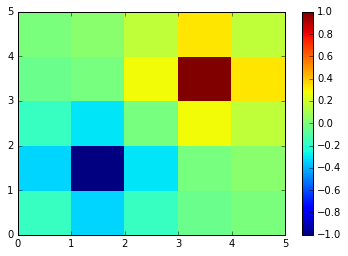

In [137]:
M=5
phi=np.zeros((M+1,M+1),float)
phiprime=np.zeros((M+1,M+1),float)
target=1e-2
delta=1

while delta>target:
    for y in range(M):
        for x in range(M):
            if (x==1 and y==1):
                phi[y,x]=-1
            elif (x==3 and y==3):
                phi[y,x]=+1
            else:
                phiprime[y,x]=(phi[y+1,x]+phi[y-1,x]+phi[y,x+1]+phi[y,x-1])/4
    delta=np.max(np.abs(phi-phiprime))
 
    phi,phiprime=phiprime,phi

xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.show()
